In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

## Data Preprocessing

In [290]:
revenue_df = pd.read_excel("PermitFlow Test.xlsx", "Revenue")
hours_df = pd.read_excel("PermitFlow Test.xlsx", "Hours")
rates_df = pd.read_excel("PermitFlow Test.xlsx", "Rates")
revenue_df.head(10)

,Customer #,Archetype #,Revenue
0,1,2,3693.04
1,2,2,3379.24
2,3,1,3470.54
3,4,3,2584.54
4,5,1,1121.32
5,6,1,2047.09
6,7,1,2805.50
7,8,1,2295.36
8,9,3,2024.15
9,10,1,8523.11


In [291]:
hours_df["Date"] = pd.to_datetime(hours_df["Date"])

In [292]:
def convert_to_hours(time):
    hours, minutes, seconds = map(int, str(time).split(':'))
    total_hours = hours + minutes/60 + seconds/3600
    return total_hours

In [293]:
def convert_to_hours_new(time):
    hours, minutes, seconds = map(int, str(time).split()[1].split(':'))
    total_hours = 24 + hours + minutes/60 + seconds/3600
    return total_hours

In [294]:
filtered_df = hours_df[hours_df["Ops Lead #"] != 5]
hours_spent = filtered_df['Time'].apply(convert_to_hours)

In [295]:
filtered_df = hours_df[hours_df["Ops Lead #"] == 5]
hours_spent_new = filtered_df['Time'].apply(convert_to_hours_new)

In [296]:
hours_df["Time_Hours"] = hours_spent.append(hours_spent_new)

In [297]:
hours_df = hours_df.merge(right = rates_df, on = "Ops Lead #")

In [298]:
hours_df

,Date,Ops Lead #,Customer #,Time,Time_Hours,Rate
0,2023-06-29,1,1,01:08:00,1.133333,23.79
1,2023-06-13,1,4,02:45:16,2.754444,23.79
2,2023-06-27,1,4,00:16:53,0.281389,23.79
3,2023-10-06,1,8,01:48:27,1.807500,23.79
4,2023-06-19,1,8,00:32:08,0.535556,23.79
5,2023-02-06,1,9,02:01:05,2.018056,23.79
6,2023-06-14,1,10,01:27:20,1.455556,23.79
7,2023-06-20,1,10,02:26:23,2.439722,23.79
8,2023-06-24,1,10,01:06:34,1.109444,23.79
9,2023-06-23,1,11,02:00:44,2.012222,23.79


## Gross Margin Calculation

In [299]:
hours_df["COGS"] = hours_df["Time_Hours"]*hours_df["Rate"]

In [300]:
gs_df = hours_df.groupby("Customer #").sum().reset_index(0)

In [301]:
gs_df = gs_df.merge(right = revenue_df, on = "Customer #")

In [302]:
gs_df.drop("Ops Lead #", axis = 1, inplace = True)

In [303]:
gs_df["Gross_Margin %"] = ((gs_df["Revenue"] - gs_df["COGS"])/gs_df["Revenue"])*100

In [304]:
gs_df

,Customer #,Time_Hours,Rate,COGS,Archetype #,Revenue,Gross_Margin %
0,1,1.133333,23.79,26.962000,2,3693.04,99.269924
1,2,2.990278,40.84,61.061472,2,3379.24,98.193041
2,3,19.565556,80.37,525.199556,1,3470.54,84.866921
3,4,39.258333,204.90,1996.912717,3,2584.54,22.736243
4,5,14.375833,100.79,376.116261,1,1121.32,66.457723
5,6,53.243889,102.82,2634.938756,1,2047.09,-28.716312
6,7,17.003611,101.48,440.222647,1,2805.50,84.308585
7,8,10.584167,74.14,274.625203,1,2295.36,88.035637
8,9,6.851389,76.91,176.382875,3,2024.15,91.286077
9,10,10.597500,97.93,267.606519,1,8523.11,96.860225


### Gross Margin by Customer 

In [305]:
gs_df[["Customer #", "Gross_Margin %"]]

,Customer #,Gross_Margin %
0,1,99.269924
1,2,98.193041
2,3,84.866921
3,4,22.736243
4,5,66.457723
5,6,-28.716312
6,7,84.308585
7,8,88.035637
8,9,91.286077
9,10,96.860225


In [306]:
Total_Gross_Margin = ((sum(gs_df["Revenue"]) - sum(gs_df["COGS"]))/sum(gs_df["Revenue"]))*100
Total_Gross_Margin

78.1642066587707

### Overall Company Gross Margin = 78.2 %

## Further Analysis

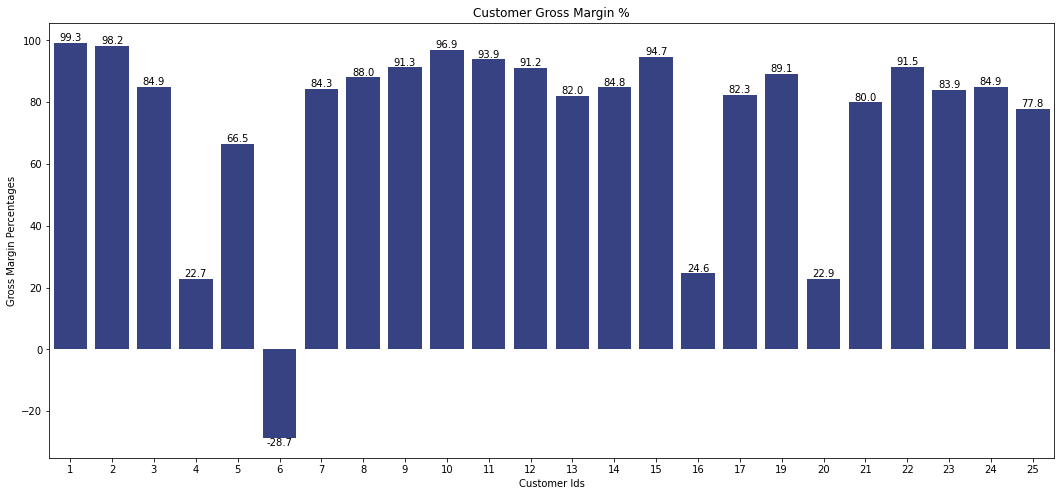

In [307]:
plt.figure(figsize=(18,8))
bar = sns.barplot(x = gs_df["Customer #"], y = gs_df["Gross_Margin %"].sort_values(ascending = False), color='#2a3990')
bar.set(title = 'Customer Gross Margin %')
bar.bar_label(bar.containers[0], fmt = '%.1f')
plt.ylabel("Gross Margin Percentages")
plt.xlabel("Customer Ids")
plt.show()

Customer 4,16,20 have really low Gross Margins. This needs to be optimised.
6 has negative Gross Margin which means company is loosing money with this customer. It needs a change in statergy.

Customer # 18 Hours missing but revenue is there in Revenue table. Might be a Data inconsitancy

Reach out to custoerms with high Gm for repeat business

In [308]:
arch_df = gs_df.groupby(by = "Archetype #").agg(COGS_Sum = ('COGS', 'sum'), Rev_Sum = ('Revenue', 'sum'), Cust_Count = ('Revenue', 'count')).reset_index(0)

In [309]:
arch_df["GM"] = ((arch_df["Rev_Sum"] - arch_df["COGS_Sum"])/arch_df["Rev_Sum"])*100

In [310]:
arch_df

,Archetype #,COGS_Sum,Rev_Sum,Cust_Count,GM
0,1,8053.890586,31120.94,10,74.120671
1,2,5026.526300,31691.73,10,84.139312
2,3,3051.882519,11067.40,4,72.424576


Archtype 2 has really good Gross Margin. We can take more customers of that type. Also, improve our margins on other archtypes.

Text(0, 0.5, 'Gross Margin')

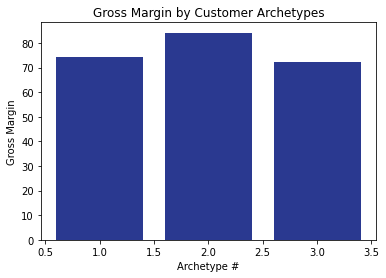

In [311]:
#plt.figure(figsize=(12,6))
plt.bar(arch_df["Archetype #"],arch_df["GM"], color = '#2a3990')
plt.title("Gross Margin by Customer Archetypes")
plt.xlabel("Archetype #")
plt.ylabel("Gross Margin")

In [312]:
ops_df = hours_df.groupby("Ops Lead #").sum().reset_index(0)

In [313]:
ops_df[["Ops Lead #", "Time_Hours", "COGS"]]

,Ops Lead #,Time_Hours,COGS
0,1,46.196389,1099.012092
1,2,88.165278,1800.334972
2,3,94.109444,2499.546844
3,4,90.306389,2460.849097
4,5,148.147500,8272.556400


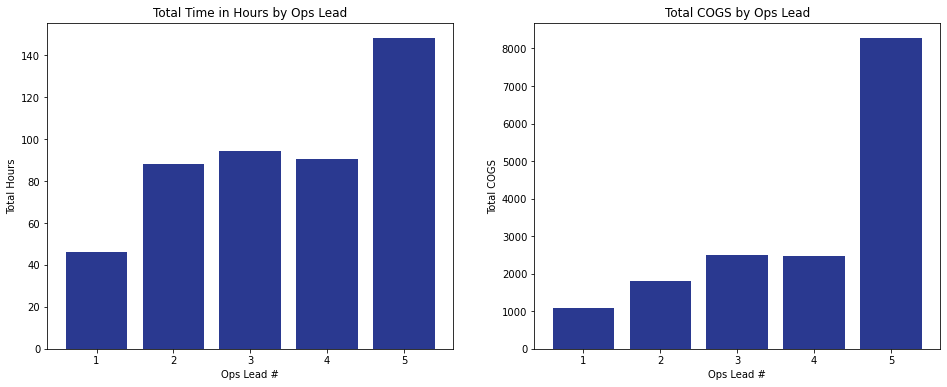

In [314]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.bar(ops_df["Ops Lead #"],ops_df["Time_Hours"], color = '#2a3990')
plt.title("Total Time in Hours by Ops Lead")
plt.xlabel("Ops Lead #")
plt.ylabel("Total Hours")

plt.subplot(1, 2, 2)
plt.bar(ops_df["Ops Lead #"],ops_df["COGS"], color = '#2a3990')
plt.xlabel("Ops Lead #")
plt.ylabel("Total COGS")
plt.title("Total COGS by Ops Lead")
plt.show()

The time spent and rate of Ops Lead 5 is really high. So the COGS is also high. This is affecting the Gross Margins negatively. The 4 Customers Ops Lead 5 worked on(4,6,16,20) have very low or negative gross margins as seen before. We need more data of why Time_Hours and Rate is high as revenue generated by 5 is not high enough!

We need to evaluate Ops Lead 5's employment time as it is clear that Ops Lead 5 is bringing down the Gross Margin due to its high Rate and their time to the customer.

The hours for Ops Lead 5 are all more than 24 for that day which is strange. Lets assume it correct, as it is fake data. But if real, we might have data accuracy issue.

Need more information about the data to understand it better. Metadata would be good. Also, more information about the customer funnel would be helpful. Starting from "Number of Leads", "Number of Sales and "Repeat Clients" and their time, How many customers dropped in which step of the process/funnel needs to be analysed too. 

In [315]:
hours_df.sort_values(by = ["Customer #", "Date"])[["Customer #", "Date", "Ops Lead #", "Time_Hours"]]

,Customer #,Date,Ops Lead #,Time_Hours
0,1,2023-06-29,1,1.133333
18,2,2023-06-19,2,1.082500
19,2,2023-06-27,2,1.907778
67,3,2023-01-06,4,8.026667
41,3,2023-06-14,3,3.112778
40,3,2023-09-06,3,8.426111
1,4,2023-06-13,1,2.754444
20,4,2023-06-22,2,0.983333
42,4,2023-06-24,3,1.070833
69,4,2023-06-25,4,0.266111
